# LeNet-5

## Import Library

In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchsummary import summary

import numpy as np
import matplotlib.pyplot as plt

from utils import train_loop,test_loop

## Check MPS Device for GPU

In [4]:
import torch
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")
else:
    print('can use GPU')
    
mps_device = torch.device("mps")

can use GPU


## Load Data

In [5]:
training_data = datasets.FashionMNIST(
    root = '../data/',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='../data/',
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=32)
test_dataloader = DataLoader(test_data, batch_size=32)

## Define Model

In [6]:
class LeNet_5(nn.Module):
    def __init__(self, num_classes=10):
        super(LeNet_5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1,6,kernel_size=5,stride=1,padding=2),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2,stride=2,padding=0),
            nn.Conv2d(6,16,kernel_size=5,stride=1,padding=0),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2,stride=2,padding=0),
            nn.Conv2d(16,120,kernel_size=5,stride=1,padding=0),
            nn.Tanh(),
        )
        self.classifier = nn.Sequential(
            nn.Linear(120,84),
            nn.Tanh(),
            nn.Linear(84,num_classes),
        )
        
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x,1)
        x = self.classifier(x)
        return x

In [7]:
model = LeNet_5()
summary(model,(1,28,28),batch_size=32)
model.to(mps_device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [32, 6, 28, 28]             156
              Tanh-2            [32, 6, 28, 28]               0
         AvgPool2d-3            [32, 6, 14, 14]               0
            Conv2d-4           [32, 16, 10, 10]           2,416
              Tanh-5           [32, 16, 10, 10]               0
         AvgPool2d-6             [32, 16, 5, 5]               0
            Conv2d-7            [32, 120, 1, 1]          48,120
              Tanh-8            [32, 120, 1, 1]               0
            Linear-9                   [32, 84]          10,164
             Tanh-10                   [32, 84]               0
           Linear-11                   [32, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.10
Forward/ba

LeNet_5(
  (features): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
  )
  (classifier): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [8]:
learning_rate = 1e-3
batch_size = 32
epochs = 20

In [9]:
loss_fn = nn.CrossEntropyLoss()

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
train_acc, train_loss = [],[]
test_acc, test_loss = [],[]
for t in range(epochs):
    tr_acc, tr_loss = train_loop(False,'GPU',train_dataloader,model,loss_fn,optimizer)
    te_acc, te_loss = test_loop(False, 'GPU',test_dataloader, model, loss_fn)
    train_acc.append(tr_acc)
    train_loss.append(tr_loss[18])
    test_acc.append(te_acc)
    test_loss.append(te_loss)
    print(f'epoch {t+1}')
    print('train loss: %.6f train acc: %.2f\ntest  loss: %.6f, test acc: %.2f' %(tr_loss[18],100*tr_acc, te_loss, 100*te_acc))
    print('-'*10)

epoch 1
train loss: 2.210006 train acc: 50.90
test  loss: 2.208565, test acc: 38.41
----------
epoch 2
train loss: 1.621632 train acc: 64.02
test  loss: 1.631875, test acc: 52.47
----------
epoch 3
train loss: 1.231665 train acc: 58.36
test  loss: 1.252791, test acc: 57.82
----------
epoch 4
train loss: 1.068581 train acc: 67.73
test  loss: 1.117800, test acc: 60.18
----------
epoch 5
train loss: 0.966514 train acc: 67.83
test  loss: 1.028042, test acc: 62.44
----------
epoch 6
train loss: 0.891360 train acc: 67.93
test  loss: 0.947644, test acc: 66.24
----------
epoch 7
train loss: 0.839309 train acc: 74.19
test  loss: 0.881402, test acc: 68.90
----------
epoch 8
train loss: 0.802655 train acc: 74.19
test  loss: 0.831567, test acc: 70.60
----------
epoch 9
train loss: 0.772422 train acc: 80.45
test  loss: 0.791930, test acc: 71.77
----------
epoch 10
train loss: 0.746073 train acc: 77.42
test  loss: 0.760207, test acc: 72.56
----------
epoch 11
train loss: 0.723530 train acc: 77.42
te

## Result of MNIST Dataset

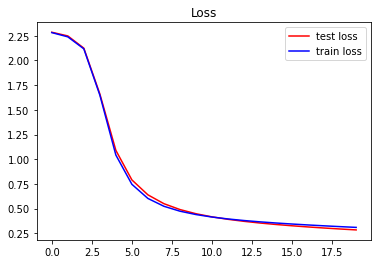

In [10]:
plt.title('Loss')
plt.plot(test_loss,'-r',label='test loss')
plt.plot(train_loss,'-b',label='train loss')
plt.legend()
plt.show()

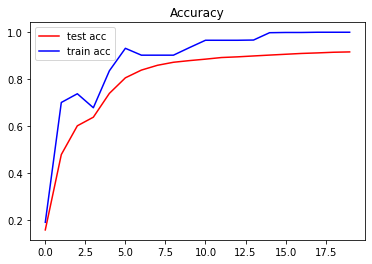

In [11]:
plt.title('Accuracy')
plt.plot(test_acc,'-r',label = 'test acc')
plt.plot(train_acc,'-b',label = 'train acc')
plt.legend()
plt.show()

## Result of Fashion MNIST Dataset

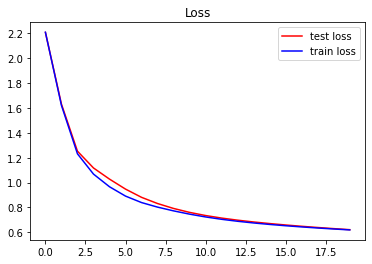

In [12]:
plt.title('Loss')
plt.plot(test_loss,'-r',label='test loss')
plt.plot(train_loss,'-b',label='train loss')
plt.legend()
plt.show()

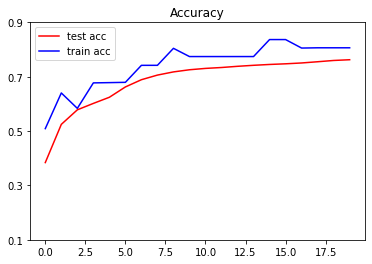

In [13]:
plt.title('Accuracy')
plt.plot(test_acc,'-r',label = 'test acc')
plt.plot(train_acc,'-b',label = 'train acc')
plt.legend()
plt.yticks(np.arange(0.1,1,0.2))
plt.show()